In [7]:
%matplotlib inline
import numpy as np
from glob import glob
from skimage import io
from matplotlib import pyplot as plt
from helperfuncs import image_slice,imm, slicing_for_assembley
import os.path
import os
import labelmask as lm

In [1]:
directory = open('path_to_datafolder.txt','r').readlines()[0].strip('\n')

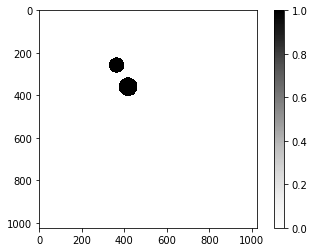

In [12]:
# label_file_list = glob(directory+'/labels/*.png')
test_label = io.imread(label_file_list[0], as_grey=True)
plt.imshow(test_label, cmap='Greys')
plt.colorbar()
# plt.Figure()


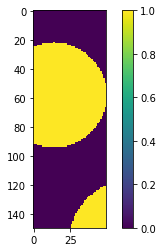

In [21]:
plt.imshow(test_label[200:350,350:400])
plt.colorbar()

(1024, 1024, 4)


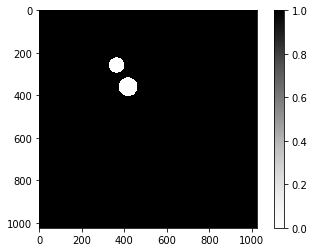

In [24]:
plt_test_label = plt.imread(label_file_list[0])
print(plt_test_label.shape)
plt.imshow(plt_test_label, cmap='Greys')
plt.colorbar()

In [25]:
image_file_list = glob(directory+'/images/*.png')

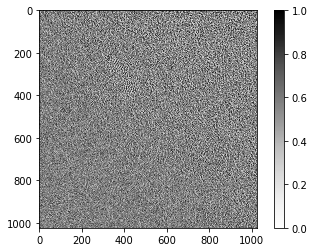

In [26]:
test_image = io.imread(image_file_list[0],as_grey=True)
plt.imshow(test_image,cmap='Greys')
plt.colorbar()

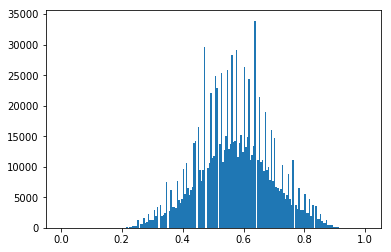

In [28]:
_ = plt.hist(test_image.flatten(),bins = 200)

In [30]:
np.any(np.isin([1],test_label[200:350,350:400]))

True

In [31]:
np.any(np.isin([1],test_label[800:1000,800:1000]))

False

In [34]:
def image_slice_small(directory):
    """used to break up the 1024x1024 images into 64x64 segments takes a
     diretory that is the source"""
    image_file_list = glob(directory+'/images/*.png')
    image_new_directory = directory + '/small_sliced_images/'
    if os.path.isdir(image_new_directory) != True:
        os.mkdir(image_new_directory)
    label_file_list = glob(directory+'/labels/*.png')
    label_new_directory = directory + '/small_sliced_labels/'
    if os.path.isdir(label_new_directory) != True:
        os.mkdir(label_new_directory)
    image_name_list = [name.split('/')[-1].split('.')[0] for name in image_file_list]
    label_name_list = [name.split('/')[-1].split('.')[0] for name in label_file_list]
    if len(image_name_list) != len(label_name_list):
        raise RuntimeError('different number of images and labels')
    if image_name_list != label_name_list:
        raise RuntimeError('images and labels did not match')
    for idx, file in enumerate(image_file_list):
        image2split = io.imread(file, as_grey=True)
        label2split = io.imread(label_file_list[idx], as_grey=True)
        for x in range(0,15*64,64):
            for y in range(0,15*64,64):
                image = image2split[x:x+64,y:y+64]
                label = label2split[x:x+64,y:y+64]
                if np.any(np.isin([1],label)) == False:
                    pass
                else:
                    image_name = image_name_list[idx]+ '_' + str(x)+ str(y) + '.png'
                    label_name = image_name_list[idx]+ '_' + str(x)+ str(y) + '.png'
                    plt.imsave(image_new_directory+image_name,image, cmap='gray')
                    plt.imsave(label_new_directory+label_name,label, cmap='gray')
    print('done!')

In [35]:
image_slice_small(directory)

done!


In [2]:
directory2 = '/Users/cgroschner/Documents/pythonDev/particleRecognition/classfier_builds/data_subset'

In [3]:
slicing_for_assembley(directory2)

done!


In [5]:
def image_slice_medium(directory):
    """Used to break up the 1024x1024 images into 256x256 segments takes a
     diretory that is the source. This is only for creating training
     dataset. Throws out regions of the masks and images with no identified
     particles so that training set will have better balance of positive and
     negative pixels."""
    image_file_list = glob(directory+'/images2/*.png')
    image_new_directory = directory + '/med_sliced_images2/'
    if os.path.isdir(image_new_directory) != True:
        os.mkdir(image_new_directory)
    label_file_list = glob(directory+'/labels2/*.png')
    label_new_directory = directory + '/med_sliced_labels2/'
    if os.path.isdir(label_new_directory) != True:
        os.mkdir(label_new_directory)
    image_name_list = [name.split('/')[-1].split('.')[0] for name in image_file_list]
    label_name_list = [name.split('/')[-1].split('.')[0] for name in label_file_list]
    if len(image_name_list) != len(label_name_list):
        raise RuntimeError('different number of images and labels')
    if image_name_list != label_name_list:
        raise RuntimeError('images and labels did not match')
    for idx, file in enumerate(image_file_list):
        image2split = io.imread(file, as_grey=True)
        label2split = io.imread(label_file_list[idx], as_grey=True)
        for x in range(0,4*256,256):
            for y in range(0,4*256,256):
                image = image2split[x:x+256,y:y+256]
                label = label2split[x:x+256,y:y+256]
                if np.any(np.isin([1],label)) == False:
                    pass
                else:
                    image_name = image_name_list[idx]+ '_' + str(x)+ str(y) + '.png'
                    label_name = image_name_list[idx]+ '_' + str(x)+ str(y) + '.png'
                    plt.imsave(image_new_directory+image_name,image, cmap='gray')
                    plt.imsave(label_new_directory+label_name,label, cmap='gray')
    print('done!')

In [5]:
image_slice_medium(directory)

done!


In [8]:
directory_raw = '/Users/cgroschner/Documents/pythonDev/particleRecognition/classfier_builds/data'

In [9]:
lm.mask_pipeline(directory_raw)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cgroschner/Documents/pythonDev/particleRecognition/classfier_builds/data/labels2/101729F_plasma15sec_Mh370kx__0000.png'

In [6]:
image_slice_medium(directory_raw)

done!


/Users/cgroschner/Documents/pythonDev/particleRecognition/classfier_builds/venv/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/cgroschner/Documents/pythonDev/particleRecognition/classfier_builds/venv/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


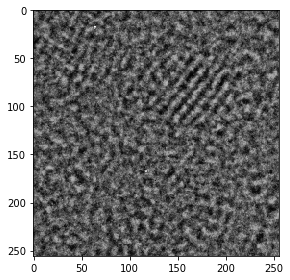

In [21]:
test_pic = io.imread(directory_raw+'/med_sliced_images/101729F_plasma15sec_Mh370kx__0000_5120.png', as_grey=True)
io.imshow(test_pic)

In [13]:
t2 = test_pic / test_pic.mean() 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


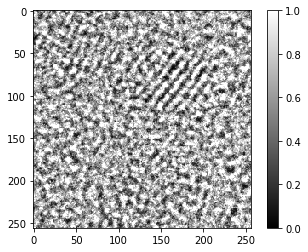

In [16]:
plt.imshow(t2,cmap='gray')
plt.colorbar()

In [24]:
test_pic.mean()

0.333340513939951

In [22]:
test_pic.max()

1.0

In [23]:
test_pic.min()

0.0

In [25]:
t2 = test_pic.copy() - test_pic.mean()

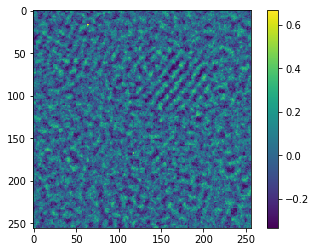

In [26]:
plt.imshow(t2)
plt.colorbar()

In [27]:
t2.mean()

-2.7321894746634712e-17